## Day 21 Lecture 2 Assignment

In this assignment, we will apply techniques for identifying and dealing with outliers to a dataset containing information about Uber rides.

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/uber_rides.csv')

In [27]:
df.head()

,trip_uid,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness
0,ee89076fd9da9bddf5f096b0ca42f8d5,0:21:33,0:29:00,0:07:27,265,5.17,9.29,12,12,0.69,4.81,0.78
1,518be51d403944a03c47e8d1f2c87311,0:19:27,0:26:00,0:06:33,255,4.97,9.93,10,10,0.70,6.53,0.66
2,6e460cc8a12c3c6568d0d4a67ac58393,1:06:53,1:23:00,0:16:07,644,13.01,18.01,14,14,0.61,5.25,0.86
3,49613a86a04e6c15d72b51d1a2935d81,0:13:37,0:20:00,0:06:23,1287,25.99,5.10,3,3,0.84,0.87,0.56
4,9896148fdecdb4c5d977a8691510bdb6,0:38:54,0:49:00,0:10:06,665,13.43,21.92,3,1,0.90,1.61,0.31


Before we identify outliers in the given columns, we need to address three time columns (trip_time, total_time, and wait_time), which are provided as formatted strings (HH:MM:SS) instead of numeric values. Convert the values in these three columns into their numeric equivalents in minutes - "2:15" should be converted to "2.25", "1:22:30" should be converted to "82.5", and so on. You may find it helpful to write a function that does this and use the .apply() function to apply it to all of the necessary columns.

In [28]:
# answer goes here
time = df['trip_time'].str.split(':').apply(lambda x: float(x[0]) * 60 + float(x[1]) + float(x[2])/60)
time1 = round(time, 2)
df['minute_trip_t'] = time1

timee =  df['total_time'].str.split(':').apply(lambda x: float(x[0]) * 60 + float(x[1]) + float(x[2])/60)
timee1 = round(timee, 2)
df['minute_total_t'] = timee1


timeee =  df['wait_time'].str.split(':').apply(lambda x: float(x[0]) * 60 + float(x[1]) + float(x[2])/60)
timeee1 = round(timeee, 2)
df['minute_wait_t'] = timeee1

df.head()


,trip_uid,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness,minute_trip_t,minute_total_t,minute_wait_t
0,ee89076fd9da9bddf5f096b0ca42f8d5,0:21:33,0:29:00,0:07:27,265,5.17,9.29,12,12,0.69,4.81,0.78,21.55,29.0,7.45
1,518be51d403944a03c47e8d1f2c87311,0:19:27,0:26:00,0:06:33,255,4.97,9.93,10,10,0.70,6.53,0.66,19.45,26.0,6.55
2,6e460cc8a12c3c6568d0d4a67ac58393,1:06:53,1:23:00,0:16:07,644,13.01,18.01,14,14,0.61,5.25,0.86,66.88,83.0,16.12
3,49613a86a04e6c15d72b51d1a2935d81,0:13:37,0:20:00,0:06:23,1287,25.99,5.10,3,3,0.84,0.87,0.56,13.62,20.0,6.38
4,9896148fdecdb4c5d977a8691510bdb6,0:38:54,0:49:00,0:10:06,665,13.43,21.92,3,1,0.90,1.61,0.31,38.90,49.0,10.10


Plot histograms for each of the column, excluding the trip ID. Which features appear to have outliers? What do you suspect the nature of these outliers is (i.e. do you think these are most likely data errors, or correct values that are simply unusually large or small?)

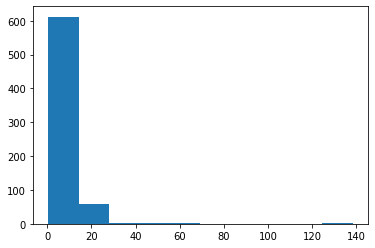

In [29]:
# answer goes here
#Only the total_time and wait_time has outliers. The waiting time likely to have an error putlier at 130 minutes. 
#Where as the total_time is probably a real extreme value.
plt.hist(df['minute_wait_t'])
plt.show()

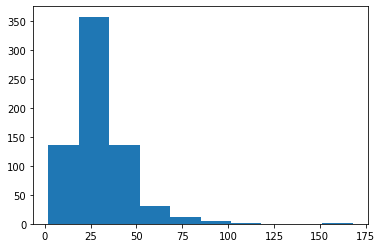

In [30]:
plt.hist(df['minute_total_t'])
plt.show()

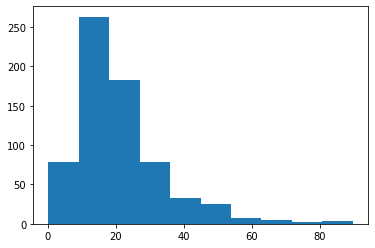

In [31]:
plt.hist(df['minute_trip_t'])
plt.show()

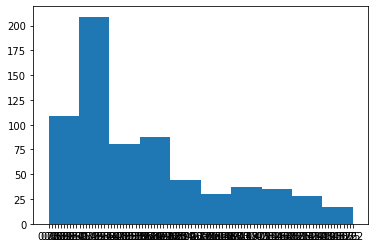

In [32]:
plt.hist(df['cloudness'])
plt.show()

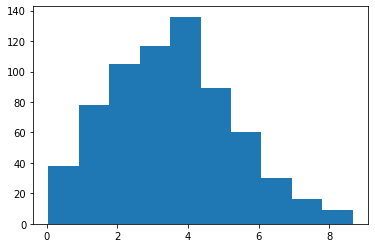

In [33]:
plt.hist(df['wind_speed'])
plt.show()

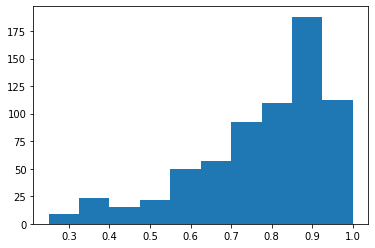

In [34]:
plt.hist(df['humidity'])
plt.show()

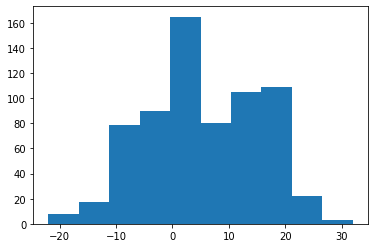

In [35]:
plt.hist(df['temperature_value'])
plt.show()

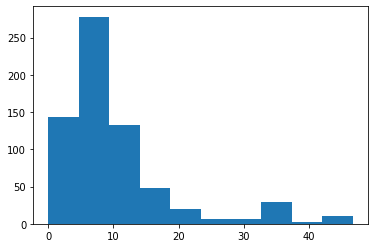

In [36]:
plt.hist(df['distance_kms'])
plt.show()

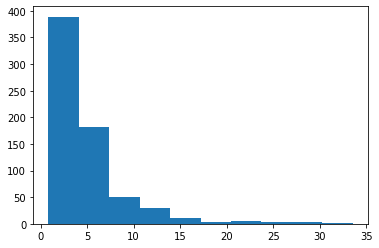

In [37]:
plt.hist(df['price_usd'])
plt.show()

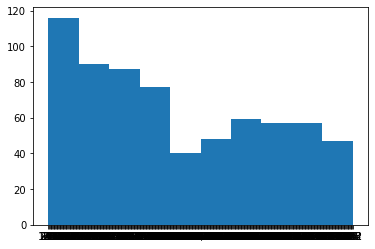

In [38]:
plt.hist(df['price_rub'])
plt.show()

Using Tukey's IQR method and a threshold value of 1.5, how many trips have trip_time values that are identified as outliers? Print these trips out.

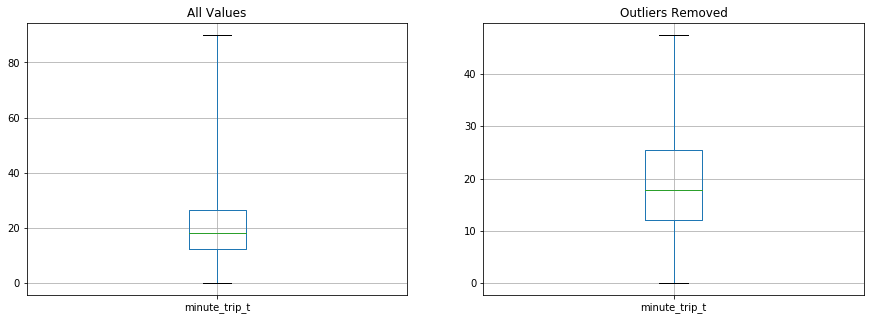

In [42]:
# answer goes here
threshold = 1.5
q75, q25 = np.percentile(df['minute_trip_t'], [75, 25])
iqr = q75 - q25
min_val = q25 - (iqr*threshold)
max_val = q75 + (iqr*threshold)
plt.figure(figsize=(15, 5))
plt.subplot(121)
df[['minute_trip_t']].boxplot(whis=5)
plt.title('All Values')
plt.subplot(122)
df.loc[(df['minute_trip_t'] < max_val) &
      (df['minute_trip_t'] > min_val),
      ['minute_trip_t']].boxplot(whis=5)
plt.title('Outliers Removed')
plt.show()

In [49]:
outliers = df.loc[(df['minute_trip_t'] > max_val) |
      (df['minute_trip_t'] < min_val),
      ['minute_trip_t']]
num_outliers = len(outliers)

In [50]:
print('According to Tukey\'s test, there are {} outliers in trip_time'.format(num_outliers))

According to Tukey's test, there are 30 outliers in trip_time


There are various ways of handling outliers, including "clipping" (also called "winsorizing"). Clip the outliers to the appropriate upper/lower threshold calculated as part of Tukey's method. Plot the histogram for trip_time after clipping; how does it look different?

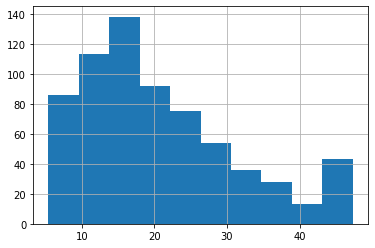

In [59]:
# answer goes here
#The difference between the look of winsorized and original trip_time is that 
#the former has only values until 47.47, and it stacks 30 values there. Whereas, the latter 
# has a greater maximum value, it is 89.78 with a much less frequency.
from scipy.stats.mstats import winsorize

win_trip = pd.Series(winsorize(df['minute_trip_t'], len(outliers)/len(df)

))

win_trip.hist()
plt.show()



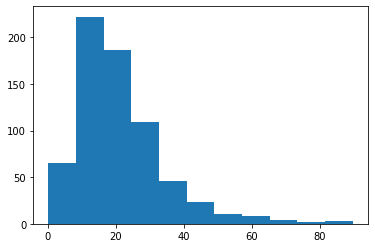

In [67]:
plt.hist(df['minute_trip_t'], bins=11)
plt.show()